**Based on Paper End to End Memory Networks - Jason Weston,Sainbayar Sukhbaatar**

In [83]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the training data
with open('train_qa.txt','rb') as f:
    train_qa = pickle.load(f)

In [3]:
# Loading the testing data
with open('test_qa.txt','rb') as f:
    test_qa = pickle.load(f)

In [5]:
# Let's check the type of data
print(type(train_qa))

<class 'list'>


In [6]:
# Let's check the length of the training data
print(f"The length of the training data is {len(train_qa)}")

The length of the training data is 10000


In [8]:
# Let's check the length of the test data
print(f"The length of the test data is {len(test_qa)}")

The length of the test data is 1000


In [10]:
# Let's check any training data.
train_qa[10]

(['Sandra',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'moved',
  'to',
  'the',
  'office',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 'yes')

In [12]:
# Let's organise it in the proper format
statement = ' '.join(train_qa[10][0])
question = ' '.join(train_qa[10][1])
answer = train_qa[10][2]

print(f"Statement: {statement}")
print('\n')
print(f"Question: {question}")
print('\n')
print(f"Answer: {answer}")

Statement: Sandra went back to the hallway . Sandra moved to the office .


Question: Is Sandra in the office ?


Answer: yes


**Our model will take Statement and Question as input and try to predict the Answer**

In [13]:
# Let's create a vocabulary which will consist of all the words present in training data and testing data

In [14]:
# since training data and testing data are list.We can add them up to create a new list which consist of both 
# train and test data
data = train_qa+test_qa

In [21]:
# Vocabulary should only consist of unique words. So lets create a vocab variable which will only consist of unique words
# from both train and test data

vocabulary = set() # empty set. It will autmatically remove the duplicate words

for statement,question,answer in data:
    vocabulary = vocabulary.union(set(statement))
    vocabulary = vocabulary.union(set(question))

# Let's add the yes and no to the vocabulary
vocabulary.add('no')
vocabulary.add('yes')

In [16]:
# Let's check the set of all the possible words in vocabulary
print(vocabulary)

{'journeyed', 'grabbed', 'in', 'went', 'bedroom', 'moved', 'took', 'John', 'Mary', 'kitchen', 'hallway', 'garden', 'put', 'got', 'picked', '.', 'dropped', 'up', 'travelled', 'discarded', 'yes', 'no', 'football', '?', 'to', 'the', 'Sandra', 'bathroom', 'office', 'left', 'Is', 'Daniel', 'back', 'there', 'milk', 'apple', 'down'}


In [20]:
# Let's take the length of vocabulary
# We add 1 so that we can later use it in pad_sequences and index 0 is a place holder.
vocabulary_length = len(vocabulary)+1

print(f"Total number of words in vocabulary is {vocabulary_length}") # 37 unique words a nd 1 place holder for pad sequences

Total number of words in vocabulary is 38


In [25]:
# Now, we have to put the statements and questions in a right format so that it can be understood and trained by our RNN model
# We will use Tokenizer and pad_sequences to convert them into right format


# Let's check the maximum length of statement present in the data

# List of length of all the statements
all_statement_length = [len(item[0]) for item in data]

# Maximum value present in the all_statement_legnth will the length of the longest statement
max_statement_length = max(all_statement_length)

# Longest statement
print(f"The length of longest statement is {max_statement_length}")

The length of longest statement is 156


In [27]:
# Let's check the maximum length of question present in the data

# List of length of all the questions
all_questions_length = [len(item[1]) for item in data]

# Maximum value present in the all_questions_legnth will the length of the longest question
max_question_length = max(all_questions_length)

# Longest statement
print(f"The length of longest question is {max_question_length}")

The length of longest question is 6


In [28]:
# Toeknization and pad sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [29]:
# Tokenizer is used to vectorize the data.Unique number is assigned to each word present in the vocabulary
tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(vocabulary)

In [30]:
# Let's check the tokenizer object. It will be a dictionary with every word assigned a unique number
tokenizer.word_index

{'journeyed': 1,
 'grabbed': 2,
 'in': 3,
 'went': 4,
 'bedroom': 5,
 'moved': 6,
 'took': 7,
 'john': 8,
 'mary': 9,
 'kitchen': 10,
 'hallway': 11,
 'garden': 12,
 'put': 13,
 'got': 14,
 'picked': 15,
 '.': 16,
 'dropped': 17,
 'up': 18,
 'travelled': 19,
 'discarded': 20,
 'yes': 21,
 'no': 22,
 'football': 23,
 '?': 24,
 'to': 25,
 'the': 26,
 'sandra': 27,
 'bathroom': 28,
 'office': 29,
 'left': 30,
 'is': 31,
 'daniel': 32,
 'back': 33,
 'there': 34,
 'milk': 35,
 'apple': 36,
 'down': 37}

In [34]:
# Now let's convert the statements,question,and answers into correct format.
# First by seperating statement,question,answer from training data and testing data.
# Then assigning each word there matching word index.
# and making each statement of same length and each question of same lenght using pad sequences.

In [39]:
# Let's create a function that will vectorize each statements,questions ans answer using pad sequences
def vectorize(data,word_index = tokenizer.word_index,max_statement_length = max_statement_length,max_question_length = max_question_length):
    
    # statements
    statements = []
    # questions
    questions = []
    # answers
    answers = []
    
    for statement,question,answer in data:
        
        # for each statement
        s = [word_index[word.lower()] for word in statement]
        
        # for each question
        q = [word_index[word.lower()] for word in question]
        
        y = np.zeros(len(word_index)+1)
        
        y[word_index[answer]] = 1
        
        statements.append(s)
        questions.append(q)
        answers.append(y)
    
    # doing the pad_sequences and returning
    return (pad_sequences(statements,maxlen = max_statement_length),pad_sequences(questions,maxlen=max_question_length),np.array(answers))
        

In [40]:
# Let's apply the above function on training data
train_statements,train_questions,train_answers = vectorize(train_qa)

In [41]:
# Let's appy the above function on testing data
test_statements,test_questions,test_answers = vectorize(test_qa)

In [42]:
# Let's check the train_statements
train_statements

array([[ 0,  0,  0, ..., 26,  5, 16],
       [ 0,  0,  0, ..., 26, 11, 16],
       [ 0,  0,  0, ..., 26, 28, 16],
       ...,
       [ 0,  0,  0, ..., 26,  5, 16],
       [ 0,  0,  0, ..., 35, 34, 16],
       [ 0,  0,  0, ..., 36, 34, 16]])

In [43]:
# Let's check the train_questions
train_questions

array([[31, 27,  3, 26, 11, 24],
       [31, 32,  3, 26, 28, 24],
       [31, 32,  3, 26, 29, 24],
       ...,
       [31, 27,  3, 26, 11, 24],
       [31,  9,  3, 26, 10, 24],
       [31,  9,  3, 26,  5, 24]])

In [63]:
# Let's check the train_answers
# please note that each item is of length of vocabulary and the value of yes will be 1 at index coresponding to its toekinzer.word_index value
# same is for no. If answer is yes 1 will be at index 21 and if no 1 will be at index 22.Rest will be 0

# we can check this is summing the value of all the items in train answer
sum(train_answers)

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0., 5012., 4988.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.])

In [64]:
# Index at 21 and 22 only have value

In [65]:
# Let's create our model
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [68]:
# We have two inputs - statements and questions.We will create a place holder for both statements and questions
# place holder shape = (max_statement_length,batch_size)
statement_sequence = Input(shape =(max_statement_length,))
question_sequence = Input(shape = (max_question_length,))

In [69]:
# Input encoder M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocabulary_length,output_dim=64))
input_encoder_m.add(Dropout(0.4))

# OUTPUT will be the form 
# (samples,max_statement_lenght,embedding_dimension)

In [71]:
# Input encoder C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocabulary_length,output_dim=max_question_length))
input_encoder_c.add(Dropout(0.4))

# OUTPUT
# (samples,max_statement_length,max_question_length)

In [72]:
# Question encoder 
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocabulary_length,output_dim=64,input_length = max_question_length))
question_encoder.add(Dropout(0.4))

# OUTPUT
# (samples,max_question_len,embedding_dimension)

In [73]:
# Lets encode the statement sequence and question sequence by passing them to input_encoder_m,input_encoder_c and question_encoder
input_encoded_m = input_encoder_m(statement_sequence)

input_encoded_c = input_encoder_c(statement_sequence)

question_encoded = question_encoder(question_sequence)

In [75]:
# Now we take the dot product of input_encoded_m,question encoded
dot_product = dot([input_encoded_m,question_encoded],axes=(2,2))

# Let's apply the sofmax axtivation function on dot_product
dot_product = Activation('softmax')(dot_product)

In [80]:
# Now adding the dot_product to input_encoded_c
output_memory = add([dot_product,input_encoded_c])

# To get the required dimension of the input
output_memory = Permute((2,1))(output_memory)

In [82]:
# output_memory and question encoded are added and then passed through weights and softmax activation to predict final ouput 
prediction=concatenate([output_memory,question_encoded])

prediction = LSTM(32)(prediction)

prediction = Dropout(0.5)(prediction)

prediction = Dense(vocabulary_length)(prediction) # output layer

prediction = Activation('softmax')(prediction)

In [84]:
# Now everything is ready.Let's arrange them to create our model.
model = Model([statement_sequence,question_sequence],prediction)

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
______________________________________________________________________________________________

In [85]:
# Let's fit our model. We will use 32 as batch size,epochs=150
model.fit([train_statements,train_questions],train_answers,batch_size=32,epochs = 150,validation_data = ([test_statements,test_questions],test_answers))

Epoch 1/150
313/313 [==============================] - 23s 31ms/step - loss: 0.9018 - accuracy: 0.5063 - val_loss: 0.7022 - val_accuracy: 0.4970
Epoch 2/150
313/313 [==============================] - 8s 26ms/step - loss: 0.7053 - accuracy: 0.5024 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 3/150
313/313 [==============================] - 8s 24ms/step - loss: 0.6960 - accuracy: 0.4975 - val_loss: 0.6952 - val_accuracy: 0.4970
Epoch 4/150
313/313 [==============================] - 7s 22ms/step - loss: 0.6956 - accuracy: 0.4986 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 5/150
313/313 [==============================] - 6s 20ms/step - loss: 0.6937 - accuracy: 0.5119 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 6/150
313/313 [==============================] - 7s 22ms/step - loss: 0.6951 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 7/150
313/313 [==============================] - 6s 20ms/step - loss: 0.6938 - accuracy: 0.5078 - val_loss: 0.6941 - val_accuracy

313/313 [==============================] - 7s 23ms/step - loss: 0.3705 - accuracy: 0.8341 - val_loss: 0.3943 - val_accuracy: 0.8230
Epoch 58/150
313/313 [==============================] - 7s 22ms/step - loss: 0.3690 - accuracy: 0.8372 - val_loss: 0.4237 - val_accuracy: 0.8040
Epoch 59/150
313/313 [==============================] - 7s 24ms/step - loss: 0.3698 - accuracy: 0.8384 - val_loss: 0.3932 - val_accuracy: 0.8210
Epoch 60/150
313/313 [==============================] - 7s 22ms/step - loss: 0.3637 - accuracy: 0.8419 - val_loss: 0.3989 - val_accuracy: 0.8240
Epoch 61/150
313/313 [==============================] - 7s 23ms/step - loss: 0.3646 - accuracy: 0.8452 - val_loss: 0.4075 - val_accuracy: 0.8120
Epoch 62/150
313/313 [==============================] - 7s 23ms/step - loss: 0.3550 - accuracy: 0.8433 - val_loss: 0.4389 - val_accuracy: 0.8220
Epoch 63/150
313/313 [==============================] - 7s 23ms/step - loss: 0.3619 - accuracy: 0.8404 - val_loss: 0.3940 - val_accuracy: 0.818

313/313 [==============================] - 7s 24ms/step - loss: 0.2983 - accuracy: 0.8748 - val_loss: 0.4108 - val_accuracy: 0.8260
Epoch 114/150
313/313 [==============================] - 7s 23ms/step - loss: 0.2916 - accuracy: 0.8776 - val_loss: 0.4199 - val_accuracy: 0.8220
Epoch 115/150
313/313 [==============================] - 8s 24ms/step - loss: 0.2942 - accuracy: 0.8760 - val_loss: 0.4251 - val_accuracy: 0.8260
Epoch 116/150
313/313 [==============================] - 7s 22ms/step - loss: 0.2834 - accuracy: 0.8808 - val_loss: 0.4447 - val_accuracy: 0.8200
Epoch 117/150
313/313 [==============================] - 7s 23ms/step - loss: 0.2875 - accuracy: 0.8798 - val_loss: 0.4222 - val_accuracy: 0.8210
Epoch 118/150
313/313 [==============================] - 7s 23ms/step - loss: 0.2879 - accuracy: 0.8784 - val_loss: 0.4270 - val_accuracy: 0.8130
Epoch 119/150
313/313 [==============================] - 7s 23ms/step - loss: 0.2828 - accuracy: 0.8815 - val_loss: 0.4147 - val_accuracy:

In [86]:
# EVALUATION
metrics = pd.DataFrame(model.history.history)

metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.901824,0.5063,0.702210,0.497
1,0.705324,0.5024,0.693224,0.503
2,0.696025,0.4975,0.695179,0.497
3,0.695556,0.4986,0.693308,0.497
4,0.693650,0.5119,0.693446,0.497


<AxesSubplot:>

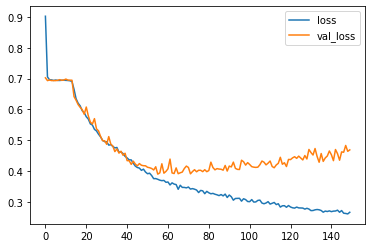

In [87]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

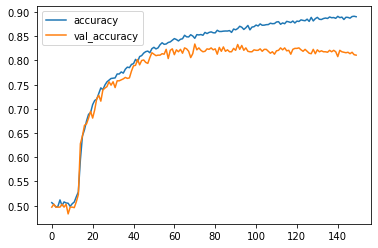

In [88]:
metrics[['accuracy','val_accuracy']].plot()

In [95]:
# Let's predict on testing data
prediction = model.predict(([test_statements,test_questions]))

In [96]:
final_prediction = prediction.argmax(axis=1)

In [97]:
final_prediction # The index value of Yes or No . If value is 21 then answer is Yes and if the value is 22, the answer is No

array([22, 21, 21, 21, 21, 22, 22, 21, 21, 21, 21, 21, 21, 22, 22, 21, 21,
       22, 22, 21, 21, 22, 21, 22, 22, 21, 21, 22, 22, 21, 21, 22, 22, 21,
       21, 22, 21, 21, 21, 22, 21, 22, 22, 22, 21, 21, 21, 22, 21, 21, 21,
       22, 21, 21, 21, 22, 22, 21, 22, 21, 22, 22, 21, 21, 21, 21, 21, 21,
       22, 21, 22, 21, 22, 21, 21, 21, 21, 21, 22, 22, 21, 22, 22, 21, 22,
       22, 21, 22, 22, 21, 21, 22, 22, 22, 22, 21, 21, 21, 21, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 22, 21, 21, 21,
       21, 22, 21, 21, 21, 21, 22, 21, 21, 22, 21, 22, 21, 22, 21, 22, 22,
       22, 22, 21, 22, 22, 21, 22, 22, 21, 21, 22, 21, 22, 22, 21, 21, 22,
       21, 22, 22, 21, 22, 22, 21, 21, 21, 22, 21, 21, 22, 21, 22, 22, 21,
       21, 22, 22, 22, 21, 21, 21, 22, 22, 22, 21, 21, 21, 21, 22, 21, 21,
       21, 22, 22, 21, 21, 22, 22, 21, 21, 21, 22, 22, 22, 21, 21, 22, 21,
       22, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 21, 22, 22, 22, 21,
       21, 22, 21, 21, 21

In [98]:
# Doing the same from test_answers so that we can compare the reult
test_answers = test_answers.argmax(axis=1)

In [99]:
from sklearn.metrics import classification_report

In [100]:
print(classification_report(test_answers,final_prediction))

              precision    recall  f1-score   support

          21       0.77      0.89      0.82       497
          22       0.87      0.74      0.80       503

    accuracy                           0.81      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.81      0.81      1000



**We got the accuracy of 81%**

In [112]:
# Let's test it on few test cases
# 1:
statement = 'John moved to bedroom . Sandra is in the kitchen .'
q1 = 'is John in the bedroom ?' # answer should be yes
q2 = 'is Sandra in the kitchen ?' # answer should be yes

ans1 = 'yes'
ans2 = 'yes'

# Let's change it to proper format
statement = statement.split()
q1 = q1.split()
q2 = q2.split()

data1= [(statement,q1,ans1)]
data2 = [(statement,q2,ans2)]

# Let's send it to function vectorize
statement,question1,answer1 = vectorize(data1)
statement,question2,answer2 = vectorize(data2)

# Prediction on q1
predict_q1 = model.predict([statement,question1])

# prediction on q2
predict_q2 = model.predict([statement,question2])

In [113]:
# Let's check the prediction on q1
predict_q1.argmax()# 21 is the value for 'yes' and 22 is the value for 'no'

21

In [114]:
# Let's check the prediction on q2
predict_q2.argmax()

21

In [115]:
#2:
statement = 'Daniel left the office . John dropped the football in the garden .'
q = 'Is the football in the office ?'
ans = 'no'

# proper format
statement = statement.split()
q = q.split()

data = [(statement,q,ans)]

statement,q,ans = vectorize(data)

# Prediction
predict = model.predict([statement,q])


In [117]:
# checking the output
predict.argmax() # 22 if 'no',21 if 'yes'

22